In [1]:
import pandas as pd
from PIL import Image
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [7]:
pituitary=Image.open("C:\\Users\\Dell\\Downloads\\archive (38)\\brain-tumor-mri-dataset\\pituitary\\pi-1704.jpg")

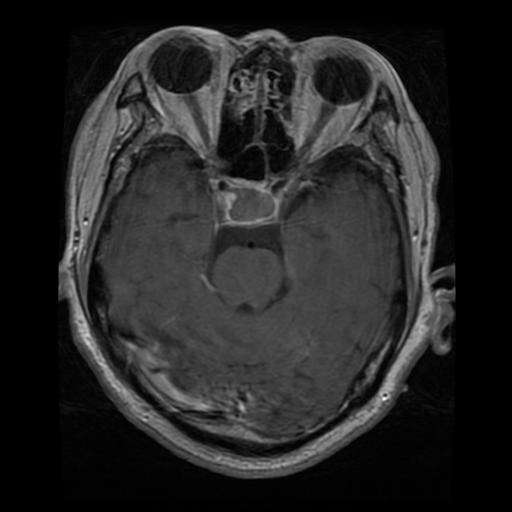

In [8]:
pituitary

In [5]:
no_tumour=Image.open('C:\\Users\\Dell\\Downloads\\archive (38)\\brain-tumor-mri-dataset\\notumor\\no-1955.jpg')

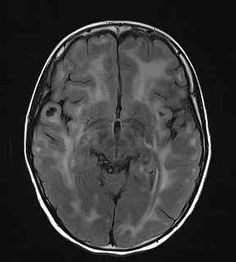

In [6]:
no_tumour

In [9]:
meningioma=Image.open('C:\\Users\\Dell\\Downloads\\archive (38)\\brain-tumor-mri-dataset\\meningioma\\me-1613.jpg')

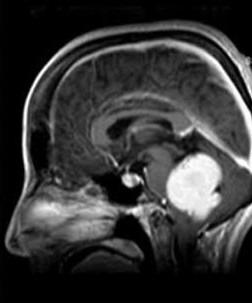

In [10]:
meningioma

In [11]:
glioma=Image.open('C:\\Users\\Dell\\Downloads\\archive (38)\\brain-tumor-mri-dataset\\glioma\\gl-1612.jpg')

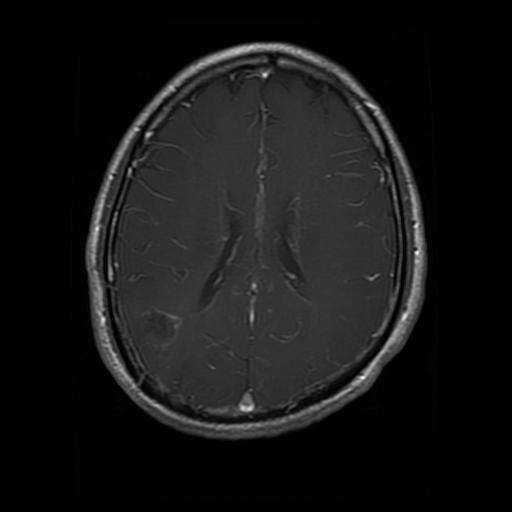

In [12]:
glioma

In [15]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Dell\Downloads\archive (38)\brain-tumor-mri-dataset",
    labels='inferred',
    label_mode='categorical',   # 4 classes → categorical
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training"
)


Found 7153 files belonging to 4 classes.
Using 5723 files for training.


In [16]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Dell\Downloads\archive (38)\brain-tumor-mri-dataset",
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation"
)

Found 7153 files belonging to 4 classes.
Using 1430 files for validation.


In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


In [18]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [24]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,927,236 (91.28 MB)

 Trainable params: 23,927,236 (91.28 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
history=model.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 514s 3s/step - accuracy: 0.6130 - loss: 1.2640 - val_accuracy: 0.8916 - val_loss: 0.3252
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 479s 3s/step - accuracy: 0.9177 - loss: 0.2221 - val_accuracy: 0.9119 - val_loss: 0.2568
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 431s 2s/step - accuracy: 0.9647 - loss: 0.0901 - val_accuracy: 0.9315 - val_loss: 0.2227
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.9835 - loss: 0.0441 - val_accuracy: 0.9413 - val_loss: 0.2158
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 555s 3s/step - accuracy: 0.9836 - loss: 0.0505 - val_accuracy: 0.9329 - val_loss: 0.2480
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.9947 - loss: 0.0138 - val_accuracy: 0.9448 - val_loss: 0.2142
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.9900 - loss: 0.0282 - val_accuracy: 0.9497 - val_loss: 0.2139
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.9993 - loss: 0.0028 - val_accu

In [27]:

y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    
    y_true.extend(np.argmax(labels.numpy(), axis=1))    # true class
    y_pred.extend(np.argmax(preds, axis=1))             # predicted class


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [34]:
from sklearn.metrics import classification_report

import os

path = r"C:\\Users\\Dell\\Downloads\\archive (38)\\brain-tumor-mri-dataset"   # folder that has glioma, pituitary, etc.
class_names = sorted(os.listdir(path))

print(class_names)


report = classification_report(y_true, y_pred, target_names=class_names)

print(report)

['glioma', 'meningioma', 'notumor', 'pituitary']
              precision    recall  f1-score   support

      glioma       0.94      0.94      0.94       289
  meningioma       0.94      0.92      0.93       385
     notumor       0.98      0.98      0.98       407
   pituitary       0.97      0.99      0.98       349

    accuracy                           0.96      1430
   macro avg       0.96      0.96      0.96      1430
weighted avg       0.96      0.96      0.96      1430



In [35]:
model.save_weights("tumor.weights.h5")